In [63]:
#IMPORTACIÓN DE LIBRERÍAS

import numpy as np
import matplotlib.pyplot as plt


In [64]:

# Datos de ejemplo
X = np.array([1, 2, 3, 4, 5])  # Variable independiente
Y = np.array([2, 3, 5, 4, 6])  # Variable dependiente

# Cálculo del coeficiente de Pearson (r) paso a paso
def pearson_coefficient(X, Y):
    n = len(X)
    
    # Medias y desviaciones estándar
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    std_X = np.std(X, ddof=1)  # ddof=1 para muestra (n-1)
    std_Y = np.std(Y, ddof=1)
    print(f"Media X: {mean_X:.4f}")
    print(f"Media Y: {mean_Y:.4f}")
    print(f"Desviación Standard X: {std_X:.4f}")
    print(f"Desviación Standard Y: {std_X:.4f}")
    print("\n")
    
    # Cálculo de los términos estandarizados (z-scores)
    z_X = (X - mean_X) / std_X
    z_Y = (Y - mean_Y) / std_Y
    
    # Suma de productos cruzados
    sum_products = np.sum(z_X * z_Y)
    
    # Coeficiente de Pearson
    r = sum_products / (n - 1)
    
    return r

# Resultado
r = pearson_coefficient(X, Y)
print(f"Coeficiente de Pearson (r): {r:.4f}")

# Verificación con numpy (opcional)
r_numpy = np.corrcoef(X, Y)[0, 1]
print(f"Verificación con numpy: {r_numpy:.4f}")

print("\n")






Media X: 3.0000
Media Y: 4.0000
Desviación Standard X: 1.5811
Desviación Standard Y: 1.5811


Coeficiente de Pearson (r): 0.9000
Verificación con numpy: 0.9000




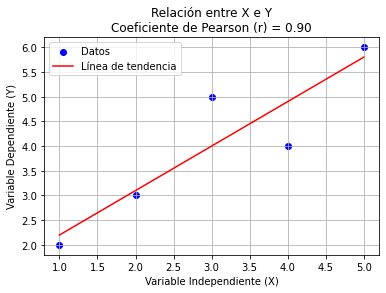

In [65]:
# Visualización
plt.scatter(X, Y, color='blue', label='Datos')
plt.title(f'Relación entre X e Y\nCoeficiente de Pearson (r) = {r:.2f}')
plt.xlabel('Variable Independiente (X)')
plt.ylabel('Variable Dependiente (Y)')

# Línea de tendencia (regresión lineal)
m, b = np.polyfit(X, Y, 1)  # Pendiente e intercepto
plt.plot(X, m * X + b, color='red', label='Línea de tendencia')

plt.legend()
plt.grid(True)
plt.savefig("images/pearson.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

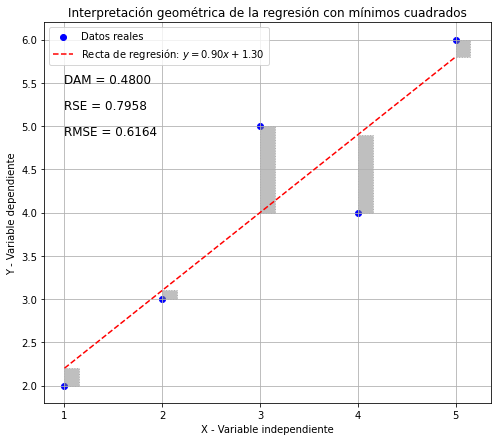

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
X = np.array([1, 2, 3, 4, 5])  # Variable independiente
Y = np.array([2, 3, 5, 4, 6])  # Variable dependiente

# Cálculos de la regresión
n = len(X)
X_mean = np.mean(X)
Y_mean = np.mean(Y)

m = np.sum((X - X_mean) * (Y - Y_mean)) / np.sum((X - X_mean) ** 2)
b = Y_mean - m * X_mean

# Predicciones
Y_pred = m * X + b

# Cálculo de métricas
DAM = np.mean(np.abs(Y - Y_pred))
RSE = np.sqrt(np.sum((Y - Y_pred) ** 2) / (n - 2))
RMSE = np.sqrt(np.mean((Y - Y_pred) ** 2))

# Generación de gráficos
fig, ax = plt.subplots(figsize=(8, 7))

# Scatter plot de los puntos reales
ax.scatter(X, Y, label="Datos reales", color="blue", marker="o")

# Línea de regresión
ax.plot(X, Y_pred, label=f"Recta de regresión: $y = {m:.2f}x + {b:.2f}$", color="red", linestyle="--")

# Anotaciones con valores de métricas
ax.text(1, 5.5, f"DAM = {DAM:.4f}", fontsize=12, color="black")
ax.text(1, 5.2, f"RSE = {RSE:.4f}", fontsize=12, color="black")
ax.text(1, 4.9, f"RMSE = {RMSE:.4f}", fontsize=12, color="black")

# Dibujo de cuadrados mínimos cuadrados
for i in range(n):
    x_i = X[i]
    y_real = Y[i]
    y_predicho = Y_pred[i]
    
    ax.add_patch(plt.Rectangle((x_i, min(y_real, y_predicho)),  # Esquina inferior izquierda
                               width=0.15,  # Ancho del rectángulo
                               height=abs(y_real - y_predicho),  # Alto según el error
                               color="gray", alpha=0.5, linestyle="dotted"))

# Configuración del gráfico
ax.set_xlabel("X - Variable independiente")
ax.set_ylabel("Y - Variable dependiente")
ax.set_title("Interpretación geométrica de la regresión con mínimos cuadrados")
ax.legend()
ax.grid(True)

# Guardar gráfico como PNG
plt.savefig("images/pendientegeometrica.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()


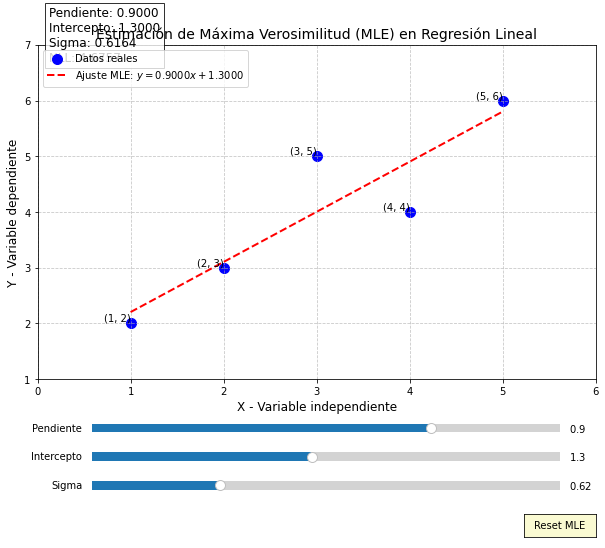

In [89]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Datos de ejemplo
X = np.array([1, 2, 3, 4, 5])  # Variable independiente
Y = np.array([2, 3, 5, 4, 6])  # Variable dependiente

# Función de verosimilitud negativa (MLE para regresión lineal)
def negative_log_likelihood(params, x, y):
    m, b, sigma = params
    y_pred = m * x + b
    nll = -np.sum(-0.5 * np.log(2 * np.pi * sigma**2) - ((y - y_pred) ** 2) / (2 * sigma**2))
    return nll  # Se minimiza la verosimilitud negativa

# Estimación inicial de parámetros
initial_params = [1, 1, 1]  # [pendiente, intercepto, desviación estándar]
result = opt.minimize(negative_log_likelihood, initial_params, args=(X, Y), method='Nelder-Mead')

# Extraer parámetros optimizados
m_mle, b_mle, sigma_mle = np.round(result.x, decimals=4)

# Configuración de la figura
fig, ax = plt.subplots(figsize=(10, 8))
plt.subplots_adjust(bottom=0.3)  # Espacio para los controles deslizantes

# Gráfico inicial
scatter = ax.scatter(X, Y, label="Datos reales", color="blue", marker="o", s=100)
line, = ax.plot(X, m_mle * X + b_mle, 
                label=f"Ajuste MLE: $y = {m_mle:.4f}x + {b_mle:.4f}$", 
                color="red", linestyle="--", linewidth=2)

# Etiquetas en los puntos de datos
for i in range(len(X)):
    ax.text(X[i], Y[i], f"({X[i]}, {Y[i]})", fontsize=10, ha="right", va="bottom", color="black")

# Ajuste de escala de los ejes
ax.set_xlim(min(X) - 1, max(X) + 1)
ax.set_ylim(min(Y) - 1, max(Y) + 1)

# Información del modelo
model_text = ax.text(0.02, 0.95, 
                    f"Pendiente: {m_mle:.4f}\nIntercepto: {b_mle:.4f}\nSigma: {sigma_mle:.4f}\nNLL: {result.fun:.4f}",
                    transform=ax.transAxes, fontsize=12, color="black",
                    bbox=dict(facecolor='white', alpha=0.8))

ax.set_xlabel("X - Variable independiente", fontsize=12)
ax.set_ylabel("Y - Variable dependiente", fontsize=12)
ax.set_title("Estimación de Máxima Verosimilitud (MLE) en Regresión Lineal", fontsize=14)
ax.legend(loc="upper left", fontsize=10)
ax.grid(True, linestyle='--', alpha=0.7)

# Creación de controles deslizantes
axcolor = 'lightgoldenrodyellow'
ax_m = plt.axes([0.2, 0.2, 0.65, 0.03], facecolor=axcolor)
ax_b = plt.axes([0.2, 0.15, 0.65, 0.03], facecolor=axcolor)
ax_sigma = plt.axes([0.2, 0.1, 0.65, 0.03], facecolor=axcolor)

slider_m = Slider(ax_m, 'Pendiente', -2.0, 2.0, valinit=m_mle, valstep=0.01)
slider_b = Slider(ax_b, 'Intercepto', -2.0, 5.0, valinit=b_mle, valstep=0.01)
slider_sigma = Slider(ax_sigma, 'Sigma', 0.1, 2.0, valinit=sigma_mle, valstep=0.01)

# Función de actualización
def update(val):
    m = slider_m.val
    b = slider_b.val
    sigma = slider_sigma.val
    
    # Actualizar línea de regresión
    y_pred = m * X + b
    line.set_ydata(y_pred)
    line.set_label(f"Ajuste actual: $y = {m:.4f}x + {b:.4f}$")
    
    # Calcular verosimilitud negativa
    current_nll = negative_log_likelihood([m, b, sigma], X, Y)
    
    # Actualizar texto del modelo
    model_text.set_text(
        f"Pendiente: {m:.4f}\nIntercepto: {b:.4f}\nSigma: {sigma:.4f}\nNLL: {current_nll:.4f}\n"
        f"MLE óptimo: {m_mle:.4f}, {b_mle:.4f}, {sigma_mle:.4f}\nNLL óptimo: {result.fun:.4f}")
    
    # Actualizar leyenda
    ax.legend(loc="upper left", fontsize=10)
    fig.canvas.draw_idle()

# Registrar función de actualización
slider_m.on_changed(update)
slider_b.on_changed(update)
slider_sigma.on_changed(update)

# Botón para resetear a los valores MLE
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = plt.Button(resetax, 'Reset MLE', color=axcolor, hovercolor='0.975')

def reset(event):
    slider_m.reset()
    slider_b.reset()
    slider_sigma.reset()
button.on_clicked(reset)

# Guardar gráfico
#plt.savefig("images/pendiente-opt.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

In [90]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [91]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Datos de ejemplo
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 3, 5, 4, 6])

# Función de verosimilitud negativa
def negative_log_likelihood(m, b, sigma):
    y_pred = m * X + b
    likelihood = -np.sum(-0.5 * np.log(2 * np.pi * sigma**2) - ((Y - y_pred) ** 2) / (2 * sigma**2))
    return likelihood  # Retorna el valor de MLE

# Función para actualizar el gráfico
def update_plot(m, b, sigma):
    Y_pred = m * X + b
    likelihood = negative_log_likelihood(m, b, sigma)  # Calcular MLE dinámicamente

    # Crear figura
    plt.figure(figsize=(8, 6))
    plt.scatter(X, Y, label="Datos reales", color="blue", marker="o")
    plt.plot(X, Y_pred, label=f"Ajuste: $y = {m:.2f}x + {b:.2f}$", color="red", linestyle="--")
    
    for i in range(len(X)):
        plt.text(X[i], Y[i], f"({X[i]}, {Y[i]})", fontsize=10, ha="right", color="black")

    plt.xlabel("X - Variable independiente")
    plt.ylabel("Y - Variable dependiente")
    plt.title(f"MLE: {likelihood:.2f}")  # Muestra el valor de MLE en el título
    plt.legend()
    plt.grid(True)
    plt.show()

# Creación de sliders
slider_m = widgets.FloatSlider(value=1.0, min=-2, max=4, step=0.01, description="Pendiente (m)")
slider_b = widgets.FloatSlider(value=1.0, min=-2, max=4, step=0.01, description="Intercepto (b)")
slider_sigma = widgets.FloatSlider(value=1.0, min=0.1, max=5, step=0.01, description="Sigma (σ)")

# Vinculación con actualización dinámica
widgets.interactive(update_plot, m=slider_m, b=slider_b, sigma=slider_sigma)




interactive(children=(FloatSlider(value=1.0, description='Pendiente (m)', max=4.0, min=-2.0, step=0.01), Float…

In [76]:
from ipywidgets.embed import embed_minimal_html

# Guardar el gráfico interactivo en un archivo HTML
embed_minimal_html('interactive_plot.html', views=[slider_m, slider_b, slider_sigma])

In [ ]:
import ipywidgets as widgets
from IPython.display import display

widgets.interactive(update_plot, m=slider_m, b=slider_b, sigma=slider_sigma)

interactive(children=(FloatSlider(value=0.9, description='Pendiente (m)', max=4.0, min=-2.0, step=0.01), Float…